<a href="https://colab.research.google.com/github/DamienShahan/Klassifikationsverfahren-in-Python/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Klassifikationsverfahren in Python: Modellentwicklung zur Kreditvorhersage einer Bank

# Inhaltsverzeichnis

1. [Business Understanding](#1.-Business-Understanding)
2. [Data Understanding](#2.-Data-Understanding)
3. [Data Preperation](#3.-Data-Preperation)
4. [Modelling](#4.-Modelling)
5. [Evalutation](#5.-Evalutation)
6. [Werte predicten](#6.-Werte-predicten)
7. [Deployment](#7.-Deployment)



# 1. Business Understanding

<b>Wie ist die Ausgangssituation?</b>

Eine Bank möchte für die Zukunft bessere Vorhersagen treffen können, ob ein Kunde seinen Kredit zurückzahlen wird oder nicht.

<b>Welche Ressourcen stehen zur Verfügung?</b>

Zur Entwicklung eines Modells, wurde ein Datensatz mit 120000 Kundeneinträgen zur Verfügung gestellt anhand der das Modell trainiert werden soll. Dazu haben wir von einem Verantwortlichen der Bank eine kurze Beschreibung der Daten in Form eines Data Dictionaries.

<b>Welche Ergebnisse sollen erreicht werden?</b>

Es soll Modell für eine Bank entwickelt werden, welches vohersagen soll, ob ein Kunde seinen Kredit zurückzahlen wird oder nicht. Dazu wird eine komplette Analyse nach dem CRISP-DM Referenzmodell durchgeführt. Zum Schluss wird das Trainingsset auf ein Testset angewandt und versucht deren Zielattribut zu prognostizieren.

# 2. Data Understanding
Das Data Understanding beinhaltet eine deskriptive und eine grafische Analyse. In der deskritiven Analyse werden die wichtigste deskriptiven Maßzahlen für die Daten erhoben und interpretiert. In der grafischen Analyse werden Diagramm erstellt, die die wichtigsten Maßzahlen visualisieren.

Im folgenden haben wir je Spalte in dem gegebenen Trainingsset sowohl eine deskriptive als auch eine grafische Analyse erstellt. Bevor mit dem Data Understanding begonnen werden kann, installieren wir alle benötigten Pakete und laden diese.

Anschließend wird das Trainingsset in einen Dataframe (df) geladen und ausgegeben. Der Dezimaltrenner (decimal) des Datensatzes ist ein Punkt und der Spaltentrenner (seperator) ein Komma.

In [89]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
plt.style.use('fivethirtyeight')

In [ ]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving trainset.csv to trainset.csv


In [188]:
#Datensatz einlesen und ausgeben
df = pd.read_csv('trainset.csv')
df = df.set_index(df['X'].values)

In [189]:
# Show data
df

,X,DefaultLast2Years,ProportionOfUnsecuredLines,Age,NumberOfTime30.59DaysPast,DebtRatio,MonthlyIncome,OpenCreditLinesAndLoans,X90DaysLate,RealEstateLoansOrLines,X60.89DaysPast,Dependents
77315,77315,0,0.665206,44,0,0.420290,2000.0,2,0,1,0,3.0
59212,59212,0,0.252986,26,0,0.117026,4639.0,9,0,0,0,0.0
71951,71951,0,0.882309,46,0,0.537526,6741.0,20,0,1,0,0.0
135632,135632,0,0.017996,52,0,0.720928,8667.0,16,0,3,0,0.0
129226,129226,0,1.000000,31,0,0.000000,0.0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
33237,33237,0,0.019228,40,0,0.468119,12075.0,6,0,2,0,2.0
6314,6314,0,0.055617,36,1,0.822058,3916.0,13,0,1,0,0.0
148836,148836,1,0.022324,74,0,0.745849,2950.0,9,1,2,0,0.0
87153,87153,0,0.884033,36,0,0.342612,10022.0,8,0,2,0,0.0


In [190]:
# Strukur des Datensatzes auslesen
df.dtypes

X                               int64
DefaultLast2Years               int64
ProportionOfUnsecuredLines    float64
Age                             int64
NumberOfTime30.59DaysPast       int64
DebtRatio                     float64
MonthlyIncome                 float64
OpenCreditLinesAndLoans         int64
X90DaysLate                     int64
RealEstateLoansOrLines          int64
X60.89DaysPast                  int64
Dependents                    float64
dtype: object

Die Skalierung der Attribute sieht auf den ersten Blick durchweg gut aus. Bis auf die Variable DefaultLast2Years sehen die Datentypen auch richtig aus. Die Spalte DefaultLast2Years wird von Integer in Factor gecastet. Zur Sicherheit casten wir allerdings auch noch die anderen Variablen.

In [191]:
# Variable als factor casten
df['DefaultLast2Years'] = df['DefaultLast2Years'].astype('category')
#df['DefaultLast2Years'] = df['DefaultLast2Years'].astype('object')

In [192]:
# Strukur des Datensatzes auslesen
df.dtypes

X                                int64
DefaultLast2Years             category
ProportionOfUnsecuredLines     float64
Age                              int64
NumberOfTime30.59DaysPast        int64
DebtRatio                      float64
MonthlyIncome                  float64
OpenCreditLinesAndLoans          int64
X90DaysLate                      int64
RealEstateLoansOrLines           int64
X60.89DaysPast                   int64
Dependents                     float64
dtype: object

In [ ]:
# Anzahl der Zeilen im Datensatz
len(df)

120000

In [ ]:
# Summary des Datensatzes ausgeben lassen
df.describe()

,X,ProportionOfUnsecuredLines,Age,NumberOfTime30.59DaysPast,DebtRatio,MonthlyIncome,OpenCreditLinesAndLoans,X90DaysLate,RealEstateLoansOrLines,X60.89DaysPast,Dependents
count,120000.00000,120000.000000,120000.000000,120000.000000,120000.000000,9.620800e+04,120000.000000,120000.000000,120000.000000,120000.000000,116821.000000
mean,75042.95220,6.299766,52.300783,0.428567,355.264003,6.668795e+03,8.461142,0.274200,1.020658,0.247983,0.758100
std,43290.04647,263.333613,14.762532,4.284176,2200.367663,1.469124e+04,5.149796,4.261821,1.133112,4.247529,1.114461
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37656.75000,0.029717,41.000000,0.000000,0.175756,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75073.00000,0.153941,52.000000,0.000000,0.367897,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112501.25000,0.557692,63.000000,0.000000,0.870786,8.250000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.00000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,13.000000


In [ ]:
# Prüfen auf missing values 
df.isnull().sum()

X                                 0
DefaultLast2Years                 0
ProportionOfUnsecuredLines        0
Age                               0
NumberOfTime30.59DaysPast         0
DebtRatio                         0
MonthlyIncome                 23792
OpenCreditLinesAndLoans           0
X90DaysLate                       0
RealEstateLoansOrLines            0
X60.89DaysPast                    0
Dependents                     3179
dtype: int64

In den beiden Spalten MonthlyIncome und Dependents sind Missing Values enthalten.

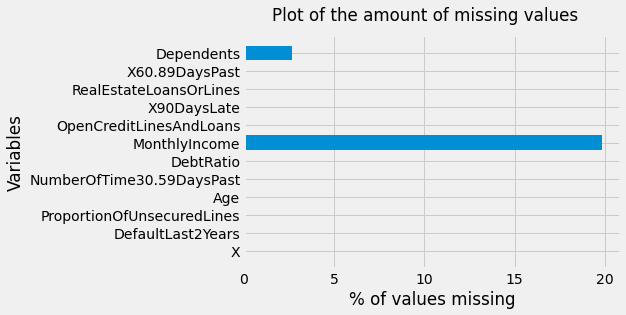

In [ ]:
# Missing Data-Plot
# get percentage of missing values
size = (df.isnull().sum()/len(df)*100)
bars = df.columns
y_pos = np.arange(len(bars))
 
# Create horizontal bars
plt.barh(y_pos, size)
 
# Create names on the x-axis
plt.yticks(y_pos, bars)

# Add title
plt.suptitle('Plot of the amount of missing values')
plt.xlabel('% of values missing')
plt.ylabel('Variables')
 
# Show graphic
plt.show()

## 2.1 Deskritive und Graphische Analyse je Variable

### 2.1.1 DefaultLast2Years
Die Spalte DefaultLast2Yeats zeigt welche Personen länger als 90 Tage eine offene Kreditrate nicht beglichen hat.

Die Spalte DefaultLast2Years enthält die Werte 0 und 1.

“0” bedeutet “nicht ausgefallen” und wird im folgenden als guter Kunde bezeichnet.

“1” bedeutet “ausgefallen” und wird im folgenden als schlechter Kunde bezeichnet.

In [77]:
#Anzahl gute Kunden
anzGK = len(df[df.DefaultLast2Years == 0])

#Anzahl schlechter Kunden
anzSK = len(df[df.DefaultLast2Years == 1])

#Anteil gute Kunden
antGK = len(df[df.DefaultLast2Years == 0])/len(df)

#Anteil schlechter Kunden
antSK = len(df[df.DefaultLast2Years == 1])/len(df)

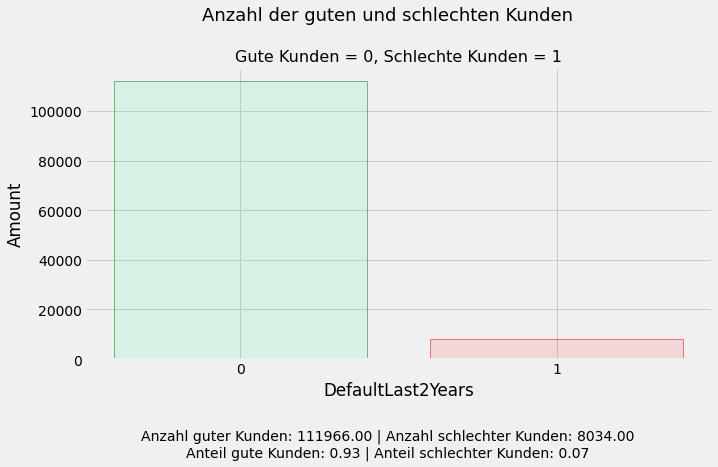

In [288]:
# Bar chart zur Verteilung von guten und schlechten Kunden plotten
fig1, ax1 = plt.subplots(figsize=(10,5))

title_string = "Anzahl der guten und schlechten Kunden"
subtitle_string = "Gute Kunden = 0, Schlechte Kunden = 1"
plt.suptitle(title_string, y=1.05, fontsize=18)
plt.title(subtitle_string, fontsize=16)

plt.ylabel('Amount')
plt.xlabel('DefaultLast2Years')

plt.bar(np.arange(len(list(df.DefaultLast2Years.value_counts().index))), df.DefaultLast2Years.value_counts(), 
        color=[(0, 1, 0.5, 0.1), (1, 0, 0, 0.1)], edgecolor=['green', 'red']
        )
ax1.set_xticks(np.arange(len(list(df.DefaultLast2Years.value_counts().index))))
ax1.set_xticklabels(list(df.DefaultLast2Years.value_counts().index))

annotation_string = "Anzahl guter Kunden: %.2f" % (anzGK) 
annotation_string += " | "
annotation_string += "Anzahl schlechter Kunden: %.2f" % (anzSK)
annotation_string += "\n"
annotation_string += "Anteil gute Kunden: %.2f" % (antGK)
annotation_string += " | "
annotation_string += "Anteil schlechter Kunden: %.2f" % (antSK)

fig1.text(.5, -.2, annotation_string, ha='center')

#plt.annotate(annotation_string , xy=(0, 50))

plt.show()

# 3. Data Preperation
Nachdem im Teil des Data Understanding eine Menge an Fehlern und Inkonsistenzen gefunden wurden, soll nun in Data Preperation Teil der Datensatz bereinigt werden. Der Data Preperation Teil beinhaltet allgemein das Filtern von Anomalien, die Behandlung von Missing Values und das Feature Engineering.